
image 1/1 /workspace/code/Github/DL-FOR-COMPUTER-VISION/test/yolo11/yolo-datasets/YOLO Datasets/test.jpeg: 448x640 6 persons, 1 sports ball, 7.6ms
Speed: 1.6ms preprocess, 7.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


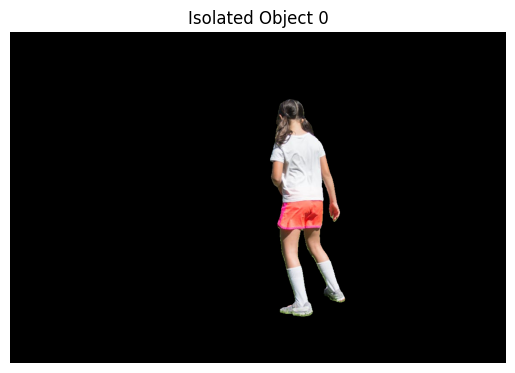

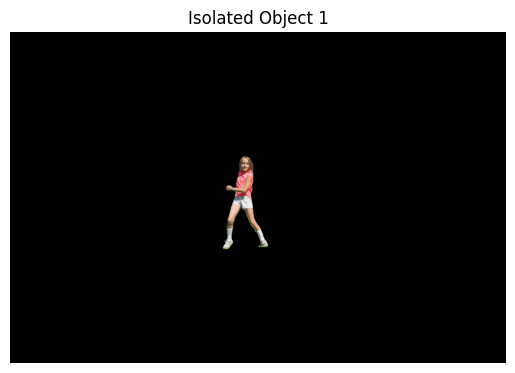

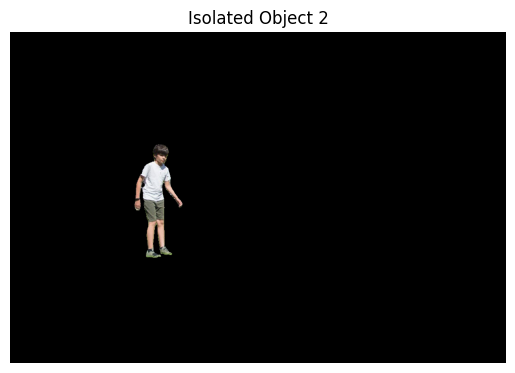

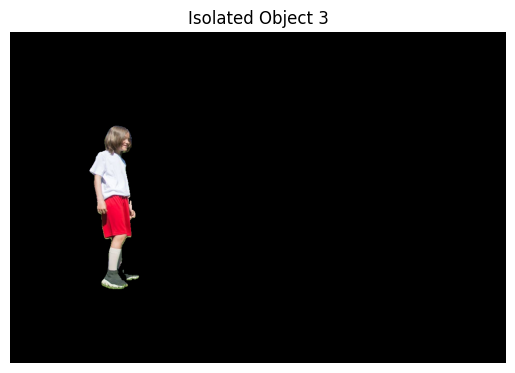

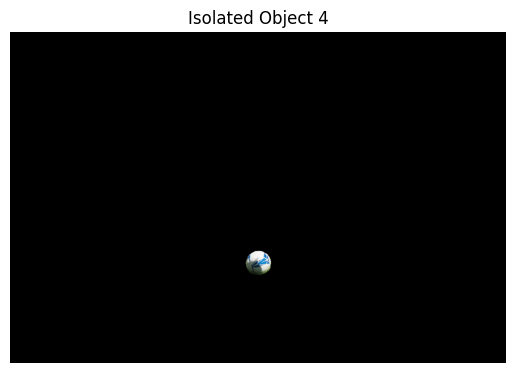

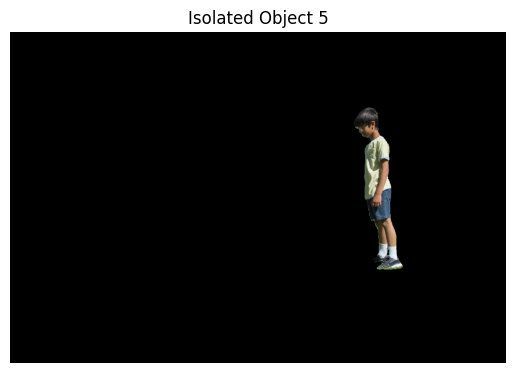

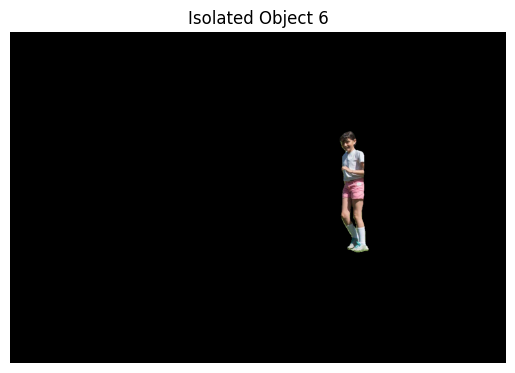

In [6]:
from ultralytics import YOLO, SAM
import cv2
import numpy as np
import matplotlib.pyplot as plt  # For visualization

# Load the YOLOv11 model
yolo_model = YOLO("yolo11n.pt")  # Replace with your model path if different

# Load the SAM model
sam_model = SAM("sam_b.pt")  # Replace with your model path if different

# Perform object detection
results = yolo_model("./yolo-datasets/YOLO Datasets/test.jpeg")  # Replace with your image path

for result in results:
    class_ids = result.boxes.cls.int().tolist()
    if class_ids:
        boxes = result.boxes.xyxy.cpu().numpy()  # Bounding boxes in (xmin, ymin, xmax, ymax) format

        # Generate segmentation masks
        sam_results = sam_model(result.orig_img, bboxes=boxes, verbose=False, device=0)

        # Use the first SAM result (sam_results[0])
        for i, (box, mask) in enumerate(zip(sam_results[0].boxes.xyxy, sam_results[0].masks.data)):
            # Convert the mask tensor to a NumPy array
            mask_np = mask.cpu().numpy()

            # Create a binary mask
            binary_mask = (mask_np > 0).astype(np.uint8) * 255

            # Create a 3-channel mask
            mask_3ch = cv2.merge([binary_mask, binary_mask, binary_mask])

            # Isolate the object using bitwise_and
            isolated_object = cv2.bitwise_and(sam_results[0].orig_img, mask_3ch)

            # Convert isolated_object to RGB for plt.imshow
            isolated_object_rgb = cv2.cvtColor(isolated_object, cv2.COLOR_BGR2RGB)

            # Save the isolated object image
            #cv2.imwrite(f"isolated_object_{i}.png", isolated_object)

            # Display the isolated object using plt.imshow
            plt.imshow(isolated_object_rgb)
            plt.axis("off")  # Turn off the axis for better visualization
            plt.title(f"Isolated Object {i}")  # Add a title for clarity
            plt.show()  # Display the image
